<div align="center">
<b>[You can access this on Kaggle too, which is more readable](https://www.kaggle.com/code/majessica/data-cleaning-sql-taylor-swift-spotify/notebook)</b>
</div>
# **Data Cleaning practice with Microsoft SQL Sever**

This is my very first project trying to clean this [Taylor Swift Spotify Dataset](https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset) on Kaggle. I decided to do this to help applying what I've learned from the *4th course* of the *Google Data Analytics Certificate Program* about data cleaning and reinforce this newly acquired knowledge.

<br>
<div id="banner" align="center">
  <img src="https://img.buzzfeed.com/buzzfeed-static/static/2023-03/18/20/asset/4384748fe195/sub-buzz-14447-1679170744-1.jpg" width="550"/>
</div>
<br>

You might ask, why did I choose Taylor Swift? Well, she is one of my favourite artists, and her recent *The Eras Tour* has been making me so hype, so I decided to find a dataset related to her. :)

***
***
# About Dataset <a class="anchor"  id="about"></a>

**#** - Index

**name** - The name of the song

**album** - The name of the album

**release_date** - *YYYY-MM-DD* -The date that the album was released

**track number** - The order the song appears on the album

**id** - The Spotify id for the song

**uri** - The Spotify uri for the song

**acousticness** - *from 0.0 to 1.0* - Amount of acoustic in the song

**danceability** - *from 0.0 to 1.0* - How suitable the song is to dancing

**energy** - *from 0.0 to 1.0* - The amount of intensity and activity in the song

**instrumentalness** - *from 0.0 to 1.0* - Amount of no vocals in the song

**liveness** - *from 0.0 to 1.0* - Presence of an audience in the recording

**loudness** - The overall loudness of a track in decibels (dB)

**speechiness** - *from 0.0 to 1.0* - The presence of spoken words in a track

**tempo** - The overall estimated tempo of a track in beats per minute (BPM)

**valence** - *from 0.0 to 1.0* - The musical positiveness conveyed by a track

**popularity** - *from 0.0 to 100* - The popularity of the song

**duration_ms** - The duration of the track in milliseconds (ms)
***
***
# List of data cleaning tasks

- [Filling in the *NULL* values in the *acousticness* column](#task1)

- [Adjusting the first column](#task2)

- [Checking the data range of some columns with constraint value](#task3)

- [Changing the format of the *duration* column from *miliseconds (ms)* to *mm:ss*](#task4)

- [Checking if there is any duplicate in the dataset](#task5)

- [Separating song name from "notes" after the hyphen (i.e. "Commentary", "Karaoke Version", etc.)](#task6)

- [Deleting supposedly unwanted column(s) to make the table look cleaner](#task7)
***
***
# Data cleaning process

Firstly, I wrote this query to have a good look of the dataset that I would be working with.

There was also an error when I tried to import this dataset into *SQL Server* which deleted some cells within the dataset so I wanted to locate them.

```ruby   
SELECT
    *
FROM
    portfolio_project.dbo.taylor_swift_spotify

## The ORDER BY clause was used to check the dataset sorted by column 1 (renamed in later steps) in ascending order, which I found to be easier to navigate.
/*
ORDER BY
    number;
*/
```

Here is what it looks like:

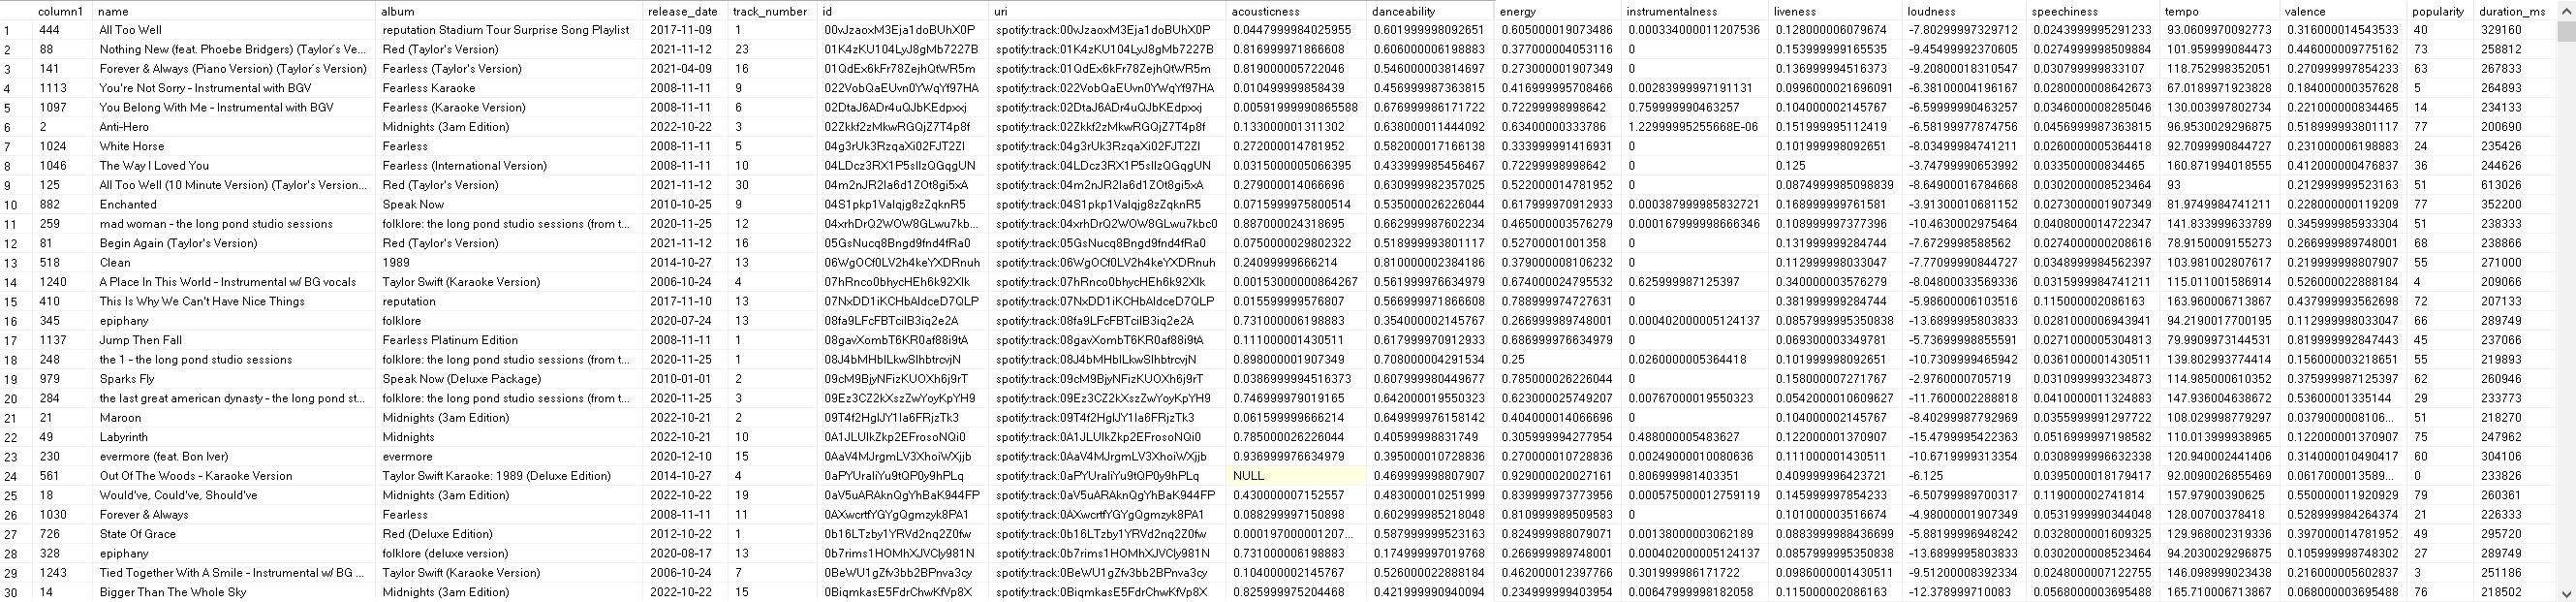
<div align="center"> <i>A glimpse at this dataset</i> </div>

***
## Filling in the *NULL* values in the *acousticness* column <a class="anchor"  id="task1"></a>

After I scrolled through the whole table, it seemed that those *NULL* values only appeared in the *acousticness* column. To check if my observation was right, I ran the query below:

```ruby
SELECT
	*
FROM
	portfolio_project.dbo.taylor_swift_spotify
WHERE
	column1 IS NULL
    OR name IS NULL
    OR album IS NULL
    OR release_date IS NULL
    OR track_number IS NULL
    OR id IS NULL
    OR uri IS NULL
    OR acousticness IS NULL
    OR danceability IS NULL
    OR energy IS NULL
    OR instrumentalness IS NULL
    OR liveness IS NULL
    OR loudness IS NULL
    OR speechiness IS NULL
    OR tempo IS NULL
    OR valence IS NULL
    OR popularity IS NULL
    OR duration_ms IS NULL
ORDER BY
	name;
```

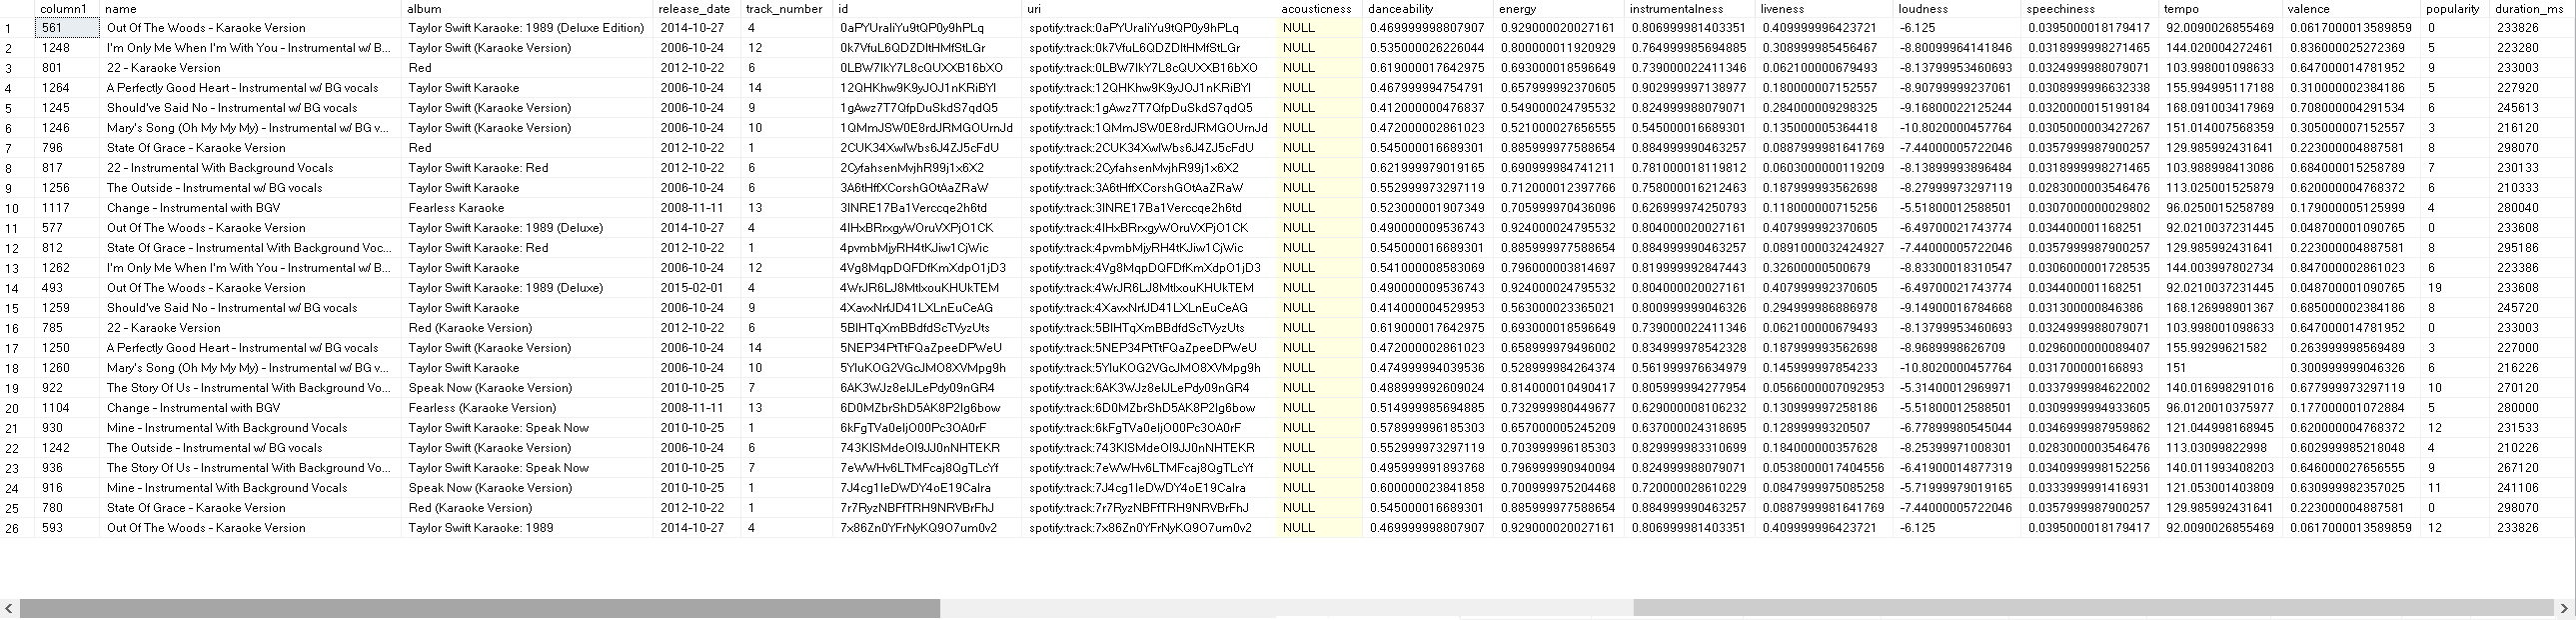
<div align="center">
    <i>All NULL values were in the acousticness column</i>
</div>

```ruby
## Checking the number of faulty cells
SELECT
	COUNT(*) AS null_acousticness_cell
FROM
	portfolio_project.dbo.taylor_swift_spotify
WHERE
	acousticness IS NULL;
```

<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/3fhf9nn/null-count.png" alt="null-count" border="0"></a><br>
    <i><b>Before: </b>26 records contained NULL</i>
</div>
<br>
There was 26 cells in the *acousticness* column that contain *NULL*, while the original dataset on Kaggle still has them all filled with numbers. Thus, I decided to fill them back in mine according to the original.

```ruby
UPDATE taylor_swift_spotify
SET
	acousticness =
	CASE id
		WHEN '6D0MZbrShD5AK8P2Ig6bow' THEN '2.47E-05'
		WHEN '3lNRE17Ba1Verccqe2h6td' THEN '2.54E-05'
		WHEN '4WrJR6LJ8MtIxouKHUkTEM' THEN '2.71E-05'
		WHEN '4IHxBRrxgyWOruVXPjO1CK' THEN '2.71E-05'
		WHEN '0aPYUraliYu9tQP0y9hPLq' THEN '2.89E-05'
		WHEN '7x86Zn0YFrNyKQ9O7um0v2' THEN '2.89E-05'
		WHEN '743KlSMdeOl9JJ0nNHTEKR' THEN '3.12E-05'
		WHEN '3A6tHffXCorshGOtAaZRaW' THEN '3.28E-05'
		WHEN '4pvmbMjyRH4tKJiw1CjWic' THEN '3.30E-05'
		WHEN '7r7RyzNBFfTRH9NRVBrFhJ' THEN '3.30E-05'
		WHEN '2CUK34XwIWbs6J4ZJ5cFdU' THEN '3.30E-05'
		WHEN '6kFgTVa0eIjO00Pc3OA0rF' THEN '3.33E-05'
		WHEN '7eWWHv6LTMFcaj8QgTLcYf' THEN '3.34E-05'
		WHEN '6AK3WJz8eIJLePdy09nGR4' THEN '3.35E-05'
		WHEN '1gAwz7T7QfpDuSkdS7qdQ5' THEN '3.36E-05'
		WHEN '7J4cg1IeDWDY4oE19CaIra' THEN '3.52E-05'
		WHEN '4XavxNrfJD41LXLnEuCeAG' THEN '4.11E-05'
		WHEN '4Vg8MqpDQFDfKmXdpO1jD3' THEN '5.28E-05'
		WHEN '5NEP34PtTtFQaZpeeDPWeU' THEN '5.82E-05'
		WHEN '12QHKhw9K9yJOJ1nKRiBYI' THEN '6.53E-05'
		WHEN '0k7VfuL6QDZDItHMfStLGr' THEN '6.85E-05'
		WHEN '1QMmJSW0E8rdJRMGOUrnJd' THEN '7.36E-05'
		WHEN '5BIHTqXmBBdfdScTVyzUts' THEN '7.89E-05'
		WHEN '0LBW7lkY7L8cQUXXB16bXO' THEN '7.89E-05'
		WHEN '5YluKOG2VGcJMO8XVMpg9h' THEN '8.14E-05'
		WHEN '2CyfahsenMvjhR99j1x6X2' THEN '9.27E-05'
		ELSE acousticness
	END;
```

<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/3fhf9nn/null-count.png" alt="null-count" border="0"></a><br>
    <i><b>After: </b>No more NULL value</i>
</div>

***

## Adjusting the first column <a class="anchor"  id="task2"></a>

The first column name appeared as *'column1'* after I imported the data, which was hard to understand, so I gave it a more descriptive name.

It also began with <code>'0'</code> so I wrote another query to make it start at <code>'1'</code>.

```ruby
## Renaming column1
EXEC sp_rename 'portfolio_project.dbo.taylor_swift_spotify.column1', 'number', 'COLUMN';

## Changing starting number from 0 to 1
UPDATE
	taylor_swift_spotify
SET
	number = number + 1
```

<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/s9WwM8w/column1.png" alt="column1" border="0"></a><br>
<i><b>Before </b>and<b> After</b> the adjustment, respectively</i>
</div>

***
## Checking the data range of some columns with constraint value <a class="anchor"  id="task3"></a>

```ruby
SELECT
	MAX(acousticness/*,
        danceability,
        energy,
        instrumentalness,
        liveness,
        loudness,
        speechiness,
        tempo,
        valence,
        popularity*/)
    AS max_value,
	MIN(acousticness/*,
        danceability,
        energy,
        instrumentalness,
        liveness,
        loudness,
        speechiness,
        tempo,
        valence,
        popularity*/)
    AS min_value
FROM
	portfolio_project.dbo.taylor_swift_spotify;
```

The query above is to make sure the data is in the specified range stated in the [About Dataset](#about) section (from 0 to 100 for *popularity*, 0 to 1 for others). Fortunately, everything is! :) 
***
## Changing the format of the **duration** column from *miliseconds (ms)* to *mm:ss* <a class="anchor"  id="task4"></a>

The original dataset lists the songs duration in miliseconds, which is really hard to know exactly how long they are and compare, so I attempted to change to a more common length format for songs (mm:ss).

<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/r5xwtsq/duration-before.png" alt="duration-before" border="0"></a><br>
    <i><b>Before: </b>The data appeared in miliseconds (ms)</i>
</div>

```ruby
## Changing the format
SELECT
	name,
	duration_ms,
	duration_ms/(1000*60) AS duration_min,
	(duration_ms%(1000*60))/1000 AS duration_sec,
	CASE
		WHEN LEN(duration_ms/(1000*60)) = 1 AND LEN((duration_ms%(1000*60))/1000) = 1
			THEN CONCAT('0', duration_ms/(1000*60), ':0', (duration_ms%(1000*60))/1000) 
		WHEN LEN(duration_ms/(1000*60)) = 1 AND LEN((duration_ms%(1000*60))/1000) = 2
			THEN CONCAT('0', duration_ms/(1000*60), ':', (duration_ms%(1000*60))/1000)
		WHEN LEN(duration_ms/(1000*60)) = 2 AND LEN((duration_ms%(1000*60))/1000) = 1
			THEN CONCAT(duration_ms/(1000*60), ':0', (duration_ms%(1000*60))/1000)
		WHEN LEN(duration_ms/(1000*60)) = 2 AND LEN((duration_ms%(1000*60))/1000) = 2
			THEN CONCAT(duration_ms/(1000*60), ':', (duration_ms%(1000*60))/1000) 
	END AS duration
FROM
	portfolio_project.dbo.taylor_swift_spotify;

## Adding a new column for the newly formatted data above
ALTER TABLE
	taylor_swift_spotify
ADD
	duration CHAR(5);

## Populating the new duration column
UPDATE
	taylor_swift_spotify
SET
	duration =
		CASE
			WHEN LEN(duration_ms/(1000*60)) = 1 AND LEN((duration_ms%(1000*60))/1000) = 1
				THEN CONCAT('0', duration_ms/(1000*60), ':0', (duration_ms%(1000*60))/1000) 
			WHEN LEN(duration_ms/(1000*60)) = 1 AND LEN((duration_ms%(1000*60))/1000) = 2
				THEN CONCAT('0', duration_ms/(1000*60), ':', (duration_ms%(1000*60))/1000)
			WHEN LEN(duration_ms/(1000*60)) = 2 AND LEN((duration_ms%(1000*60))/1000) = 1
				THEN CONCAT(duration_ms/(1000*60), ':0', (duration_ms%(1000*60))/1000)
			WHEN LEN(duration_ms/(1000*60)) = 2 AND LEN((duration_ms%(1000*60))/1000) = 2
				THEN CONCAT(duration_ms/(1000*60), ':', (duration_ms%(1000*60))/1000)
		END;
```

<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/jJ8pJ5x/duration-after.png" alt="duration-after" border="0"></a><br>
    <i><b>After: </b>The data is now shown minutes and seconds (mm:ss)</i>
</div>

***
## Checking if there is any duplicate in the dataset <a class="anchor"  id="task5"></a>

```ruby
WITH duplicate AS
	(
	SELECT
		name,
		album,
		id, 
		uri,
		ROW_NUMBER() OVER
			(
			PARTITION BY
				name,
				album,
				release_date,
				acousticness,
				danceability,
				energy,
				instrumentalness,
				liveness,
				loudness,
				speechiness,
				tempo,
				valence,
				popularity,
				duration
			ORDER BY
				name
			)
			AS no_of_duplicate
    FROM
        portfolio_project.dbo.taylor_swift_spotify
	)

SELECT
	*
FROM
	duplicate
WHERE
	no_of_duplicate > 1;
```

<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/QFsmMZg/dupe-check.png" alt="dupe-check" border="0"></a><br>
    <i>No result was returned</i>
</div>

***
## Separating song name from "notes" after the hyphen (i.e. "Commentary", "Karaoke Version", etc.)<a class="anchor"  id="task6"></a>

Some song names had additonal information to indicate their versions which made them appear too long. To make them shoter and to play around with **SUBSTRING**, I decided to divide them into subtrings with the hyphen (*'-'*) as the delimiter.
<br>
<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/Jc83VgW/hypen-examples.png" alt="hypen-examples" border="0"></a><br>
    <i>Some examples of songs with notes after the hyphen mark</i>
</div>

```ruby
## Checking if there is any song that include a hyphen within its name
SELECT
	name
from
	portfolio_project.dbo.taylor_swift_spotify
WHERE
	name LIKE '%[a-z]-[a-z]%';
```

<div align="center">
<a href="https://imgbb.com/"><img src="https://i.ibb.co/TgYV73Y/exclusion.png" alt="exclusion" border="0"></a><br>
    <i>In this case, there was a song called 'Anti-Hero'</i>
</div>

```ruby
## Separating song names, excluding 'Anti-Hero'
SELECT
	CASE
		WHEN name = 'Anti-Hero'
			THEN name
		WHEN name LIKE '%-%'
			THEN
				SUBSTRING(name, 1, CHARINDEX('-', name) - 2)
		ELSE name
	END AS song_name,
	CASE
		WHEN name = 'Anti-Hero'
			THEN '-'
		WHEN name LIKE '%-%'
			THEN
				SUBSTRING(name, CHARINDEX('-', name) + 2, LEN(name))
		ELSE '-'
	END AS note
FROM
	portfolio_project.dbo.taylor_swift_spotify;

## Adding a note column for the separated data
ALTER TABLE
	taylor_swift_spotify
ADD
	note VARCHAR(250);

## Populating the note column
UPDATE
	taylor_swift_spotify
SET
	name =
		CASE
			WHEN name = 'Anti-Hero'
				THEN name
			WHEN name LIKE '%-%'
				THEN
					SUBSTRING(name, 1, CHARINDEX('-', name) - 2)
			ELSE name
		END,
	note =
		CASE
			WHEN name = 'Anti-Hero'
				THEN '-'
			WHEN name LIKE '%-%'
				THEN
					SUBSTRING(name, CHARINDEX('-', name) + 2, LEN(name))
			ELSE '-'
		END;
```

<div align="center">
<a href="https://ibb.co/5Tp0Fmf"><img src="https://i.ibb.co/sjxfHnM/hyphen-after.png" alt="hyphen-after" border="0"></a><br>
    <i>Some examples of the end result</i>
</div>

***
## Deleting supposedly unwanted column(s) to make the table look cleaner <a class="anchor"  id="task7"></a>

Although in reality, I will rarely get the chance to delete any data from the database, in order to practice the **DROP COLUMN** command, I decided to remove *duration_ms* as it was redundant and its format is harder to read than the newly added *duration* column.

```ruby
ALTER TABLE
	taylor_swift_spotify
DROP COLUMN
	duration_ms;
```
***
### That is also the end of this project! Thank you for reading till the end.

<div align="right">
    Hope you have a great day and Happy Coding! :)
    <br>
</div>